In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Codveda_tasks/task 3/2) Stock Prices Data Set.csv")
data.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB


In [5]:
print("Missing values before handling:")
print(data.isnull().sum())


data.dropna(inplace=True)

print("\nMissing values after handling:")
print(data.isnull().sum())

Missing values before handling:
symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

Missing values after handling:
symbol    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [6]:
data = data.sort_values(by=['symbol', 'date']).reset_index(drop=True)

In [7]:
data['Target'] = (data['close'].shift(-1) > data['close']).astype(int)


In [8]:
data = data[:-1]


In [9]:
features = ['open', 'high', 'low', 'close', 'volume']
X = data[features]
y = data['Target']

In [10]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:


model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42
)


cv_results = cross_validate(
    model, X, y,
    cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    return_train_score=False
)

for metric in ['accuracy', 'precision', 'recall', 'f1']:
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize()} (CV avg): {scores.mean():.4f}")


Accuracy (CV avg): 0.5188
Precision (CV avg): 0.5193
Recall (CV avg): 0.9890
F1 (CV avg): 0.6810


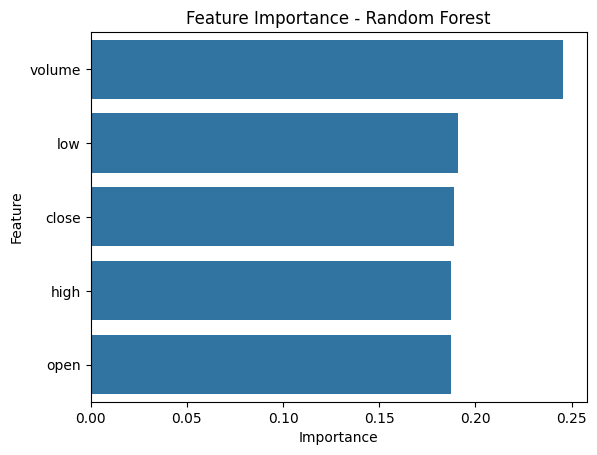

In [12]:
model.fit(X, y)

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance - Random Forest")
plt.show()


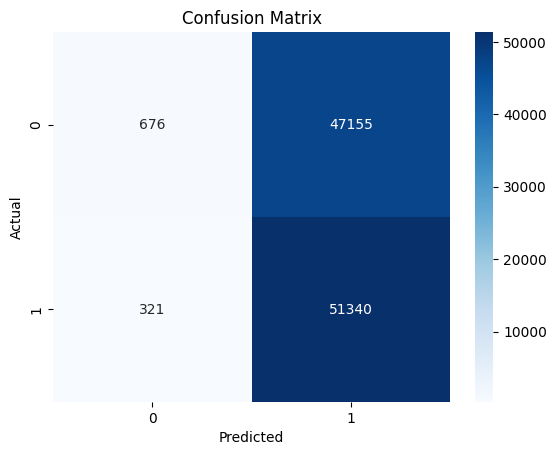

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [15]:
data.to_csv('/content/drive/MyDrive/Codveda_tasks/task 3/processed_stock_data.csv', index=False)
